# Price Prediction for second hand cars in Germant

## Steps of the Project:
1-EDA (Exploratory Data Analysis)

2-Feature Engineering

3-Data Preprocessing

4-Modeling 

  4-1-Model Selection
  
  4-2-Model Evaluation
  
  4-3-Model Tuning

5-Visualization 

4- Results 

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1-EDA (Exploratory Data Analysis)

In [5]:
# Loading Dataset
df = pd.read_csv('car_data.csv')
orignal_df = df
index = df.columns[0]

In [111]:
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [6]:
df.info

<bound method DataFrame.info of         Unnamed: 0       brand              model  color registration_date  \
0                0  alfa-romeo     Alfa Romeo GTV    red           10/1995   
1                1  alfa-romeo     Alfa Romeo 164  black           02/1995   
2                2  alfa-romeo  Alfa Romeo Spider  black           02/1995   
3                3  alfa-romeo  Alfa Romeo Spider  black           07/1995   
4                4  alfa-romeo     Alfa Romeo 164    red           11/1996   
...            ...         ...                ...    ...               ...   
251074      251074       volvo         Volvo XC40  white           04/2023   
251075      251075       volvo         Volvo XC90  white           03/2023   
251076      251076       volvo          Volvo V60  white           05/2023   
251077      251077       volvo         Volvo XC40  white           05/2023   
251078      251078       volvo         Volvo XC40   gold           03/2023   

        year price_in_euro powe

In [7]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0       brand              model  color registration_date  \
0                0  alfa-romeo     Alfa Romeo GTV    red           10/1995   
1                1  alfa-romeo     Alfa Romeo 164  black           02/1995   
2                2  alfa-romeo  Alfa Romeo Spider  black           02/1995   
3                3  alfa-romeo  Alfa Romeo Spider  black           07/1995   
4                4  alfa-romeo     Alfa Romeo 164    red           11/1996   
...            ...         ...                ...    ...               ...   
251074      251074       volvo         Volvo XC40  white           04/2023   
251075      251075       volvo         Volvo XC90  white           03/2023   
251076      251076       volvo          Volvo V60  white           05/2023   
251077      251077       volvo         Volvo XC40  white           05/2023   
251078      251078       volvo         Volvo XC40   gold           03/2023   

        year price_in_euro po

In [8]:
# Extracting the unique values from brand column and counting rows for each brand
unique_brands = df['brand'].unique()
num_unique_brands = len(unique_brands)
print(f'there are {num_unique_brands} unique brands in the dataset.')
print('the brands are: ')
for brand in unique_brands:
    print(brand)
print('\nNumber of rows for each brand:')
brand_counts = df['brand'].value_counts()
print(brand_counts)

there are 47 unique brands in the dataset.
the brands are: 
alfa-romeo
aston-martin
audi
bentley
bmw
cadillac
chevrolet
chrysler
citroen
dacia
daewoo
daihatsu
dodge
ferrari
fiat
ford
honda
hyundai
infiniti
isuzu
jaguar
jeep
kia
lada
lamborghini
lancia
land-rover
maserati
mazda
mercedes-benz
mini
mitsubishi
nissan
opel
peugeot
porsche
proton
renault
rover
saab
seat
skoda
smart
ssangyong
toyota
volkswagen
volvo

Number of rows for each brand:
brand
volkswagen       33281
mercedes-benz    27226
audi             21161
opel             20388
bmw              19810
ford             18790
skoda            14039
seat             11949
renault           8694
toyota            8228
hyundai           6989
peugeot           5848
kia               5734
fiat              5039
mini              4295
mazda             4211
volvo             4164
citroen           4083
porsche           3958
nissan            3784
dacia             3367
land-rover        3073
jeep              1749
smart             16

In [114]:
# listing features
df.columns

Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [115]:
# renaming and dropping some columns 
df.rename(columns={"price_in_euro": "price"}, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [116]:
df.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

In [117]:
"""we select the following features w numerical values
to be considered against the price"""
numerical_cols = ['year','price','power_kw', 'fuel_consumption_g_km',
       'mileage_in_km'] 
print(numerical_cols)

['year', 'price', 'power_kw', 'fuel_consumption_g_km', 'mileage_in_km']


In [118]:
"""Defining list of categorical features"""
categorical_cols = ['brand', 'model', 'fuel_type']

In [119]:
selected_cols = numerical_cols + categorical_cols
print(selected_cols)

['year', 'price', 'power_kw', 'fuel_consumption_g_km', 'mileage_in_km', 'brand', 'model', 'fuel_type']


In [120]:
# Check for missing values
def check_missing(df):
    print("\nMissing values:")
    for x in selected_cols:
        print(x, df[x].isnull().sum(), df[x].dtype)
        
check_missing(df)


Missing values:
year 0 object
price 0 object
power_kw 134 object
fuel_consumption_g_km 0 object
mileage_in_km 152 float64
brand 0 object
model 0 object
fuel_type 0 object


In [121]:
# since there are only very few missing values, we just drop them
df.dropna(inplace=True)
check_missing(df)    


Missing values:
year 0 object
price 0 object
power_kw 0 object
fuel_consumption_g_km 0 object
mileage_in_km 0 float64
brand 0 object
model 0 object
fuel_type 0 object


In [122]:
# cleaning column year as it has irrelated values
print('Year column values:')
print(df['year'].unique())

Year column values:
['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023' 'Petrol'
 'Diesel' 'Manual' '04/2006' 'LPG' 'Hybrid' '03/2015' '39.900 km'
 '18.990 km' '05/2021' 'Automatic' '11/2013' 'CNG']


In [123]:
df['year'].iloc[200000]

'2012'

In [124]:
"""Based on above, one has to filter years out of the first 29 
enetries coveriing 1995-2023:
"""
tobefiltered = df['year'].unique()[:29]
newfilter = []
for i in range(df.shape[0]):
    newfilter.append(df['year'].iloc[i] in tobefiltered)
    
df = df[newfilter]
print(df['year'].unique())

['1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']


In [125]:
# convert types
df['price'] = df['price'].astype(int)
df['power_kw'] = df['power_kw'].astype(float)
df['mileage_in_km'] = df['mileage_in_km'].astype(float)

/tmp/ipykernel_64155/2465308514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(int)
/tmp/ipykernel_64155/2465308514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power_kw'] = df['power_kw'].astype(float)
/tmp/ipykernel_64155/2465308514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [126]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].astype(float)

ValueError: could not convert string to float: '260 g/km'

In [127]:
print(df['fuel_consumption_g_km'].unique())
print(len(df['fuel_consumption_g_km']))
print(len(df['fuel_consumption_g_km'].unique()))

['260 g/km' '225 g/km' '- (g/km)' ... '410 km Reichweite'
 '424 km Reichweite' '77 km Reichweite']
223733
1180


So fuel_consumption_g_km has wierd values that must be cleaned

In [128]:
#This code for converting did not work. Check later why...
"""
df['fuel_consumption_g_km'] = df.apply(
    lambda row: float(row['fuel_consumption_g_km'][:3]) 
    if (isinstance(row['fuel_consumption_g_km'], str))
    and ('Reichweite' in row['fuel_consumption_g_km']) 
    and ('k' not in row['fuel_consumption_g_km'][:3])
    else row['fuel_consumption_g_km'],
    axis=1
)

print(df['fuel_consumption_g_km'].unique())
print(len(df['fuel_consumption_g_km']))
"""

"\ndf['fuel_consumption_g_km'] = df.apply(\n    lambda row: float(row['fuel_consumption_g_km'][:3]) \n    if (isinstance(row['fuel_consumption_g_km'], str))\n    and ('Reichweite' in row['fuel_consumption_g_km']) \n    and ('k' not in row['fuel_consumption_g_km'][:3])\n    else row['fuel_consumption_g_km'],\n    axis=1\n)\n\nprint(df['fuel_consumption_g_km'].unique())\nprint(len(df['fuel_consumption_g_km']))\n"

In [129]:
import re

# Define a function to extract the numeric part and convert it to a float
def extract_numeric(s):
    match = re.match(r'\d+(\.\d+)?', s)
    if match:
        return float(match.group())
    else:
        return None  # Return None if no numeric part is found

# Apply the function to the 'fuel_consumption_g_km' column
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].apply(extract_numeric)

/tmp/ipykernel_64155/1424094474.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].apply(extract_numeric)


In [130]:
print(df['fuel_consumption_g_km'].unique())
print(len(df['fuel_consumption_g_km']))
print(len(df['fuel_consumption_g_km'].unique()))

[260.    225.        nan 210.    320.    265.    220.    125.    278.
 200.    271.    195.    202.      1.    192.    283.    286.    211.
 194.    218.    201.    175.    204.    212.    196.    287.    208.
 154.    206.    296.    199.    160.    295.    207.    165.    159.
 231.    209.    162.    157.    205.    215.    275.    221.    179.
 273.    155.    223.    198.    180.    288.    217.    224.    183.
 190.    289.    153.    181.    187.    138.    186.    189.    145.
 126.    119.    176.    140.    134.    130.    156.    139.    379.
 122.    129.    149.     90.    177.    114.    142.    152.    133.
 124.    104.    164.    117.    127.     98.    121.    111.    135.
 110.    166.     99.    112.    100.    144.     89.    109.    161.
 103.    113.    222.    184.    178.    188.    214.    170.    227.
 123.      0.    174.    261.    185.    128.    147.    169.    171.
 236.    228.    150.    229.    254.    158.    131.    136.    243.
 167.    168.    146

In [131]:
for x in selected_cols:
    print(x, df[x].isna().sum(), df[x].dtype)

year 0 object
price 0 int64
power_kw 0 float64
fuel_consumption_g_km 22611 float64
mileage_in_km 0 float64
brand 0 object
model 0 object
fuel_type 0 object


In [132]:
df.to_csv =('clean_car_data.csv')

In [133]:
df

,brand,model,color,registration_date,year,price,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148.0,201,Manual,Petrol,"10,9 l/100 km",260.0,160500.0,2.0 V6 TB
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110.0,150,Manual,Petrol,"9,5 l/100 km",225.0,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132.0,179,Manual,Petrol,"7,2 l/100 km",NaN,96127.0,"3.0i Super V6, absoluter Topzustand !"
5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900,110.0,150,Manual,Petrol,"9,5 l/100 km",225.0,47307.0,2.0 16V Twin Spark
6,alfa-romeo,Alfa Romeo 145,red,12/1996,1996,3500,110.0,150,Manual,Petrol,"8,8 l/100 km",210.0,230000.0,Quadrifoglio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251071,volvo,Volvo XC60,silver,04/2023,2023,81350,228.0,310,Automatic,Hybrid,"7,4 l/100 km",167.0,60.0,"XC 60 T8 AWD Ultimate Dark PHEV NAVI,AHK,STHZ,..."
251072,volvo,Volvo XC60,silver,05/2023,2023,55400,145.0,197,Automatic,Diesel,"5,6 l/100 km",142.0,5000.0,B4 Autom. Plus Dark Keyless-Start/Klima/LED/BC
251073,volvo,Volvo XC60,silver,03/2023,2023,54500,145.0,197,Automatic,Diesel,"5,6 l/100 km",142.0,5900.0,B4 Autom. Plus Dark Sitzhzg.
251075,volvo,Volvo XC90,white,03/2023,2023,89690,173.0,235,Automatic,Diesel,"7,6 l/100 km",202.0,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...


### Anomolies and Outliars detection via matplotlib visualization
For visual inspections, we plot histograms for numerical features and bar plots for categorical features

Text(0.5, 1.0, 'Number Per Brand')

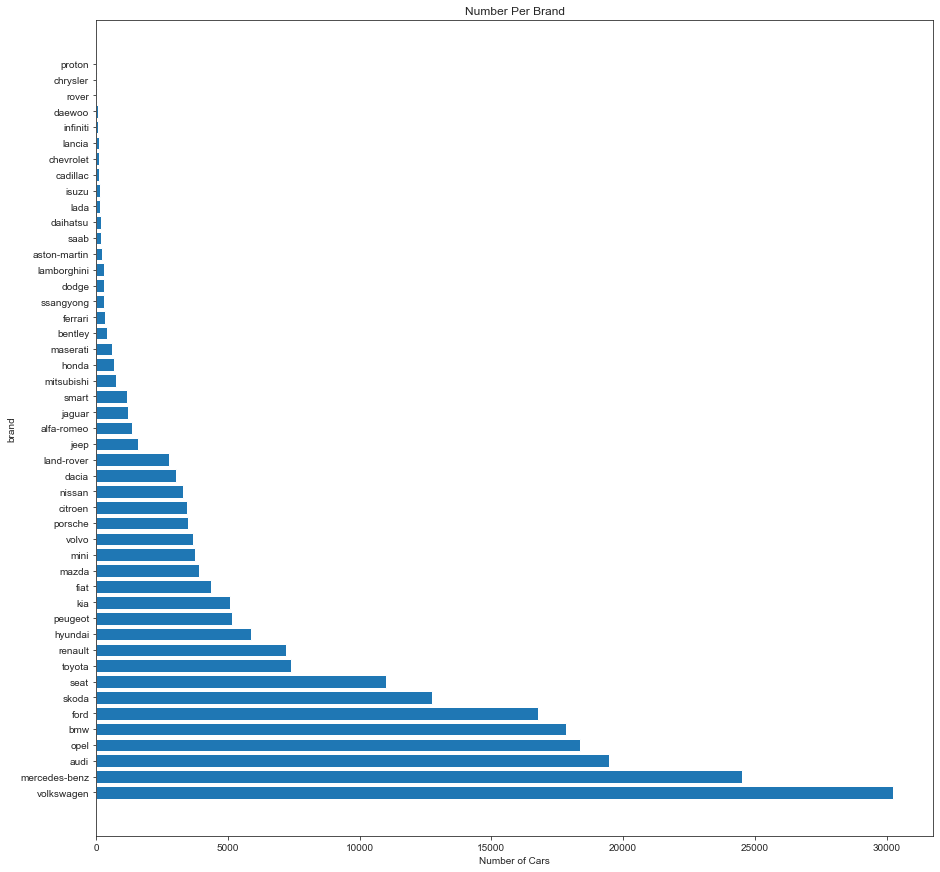

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('ticks')
#colors = sns.color_palette('pastel')
plt.figure(figsize=(15,15))

plt.barh(df['brand'].value_counts().index, df['brand'].value_counts().values)
plt.xlabel('Number of Cars')
plt.ylabel('brand')
plt.title('Number Per Brand')

Text(0.5, 1.0, 'Number Per Year')

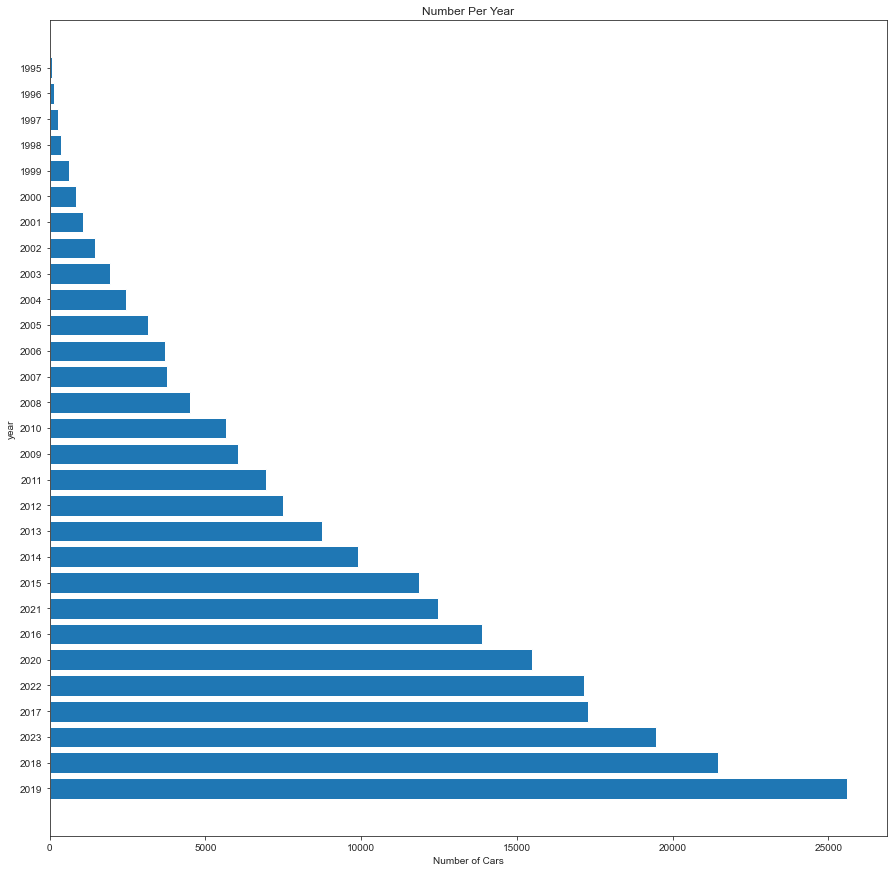

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('ticks')
#colors = sns.color_palette('pastel')
plt.figure(figsize=(15,15))

plt.barh(df['year'].value_counts().index, df['year'].value_counts().values)
plt.xlabel('Number of Cars')
plt.ylabel('year')
plt.title('Number Per Year')

Text(0.5, 1.0, 'Number Per Price')

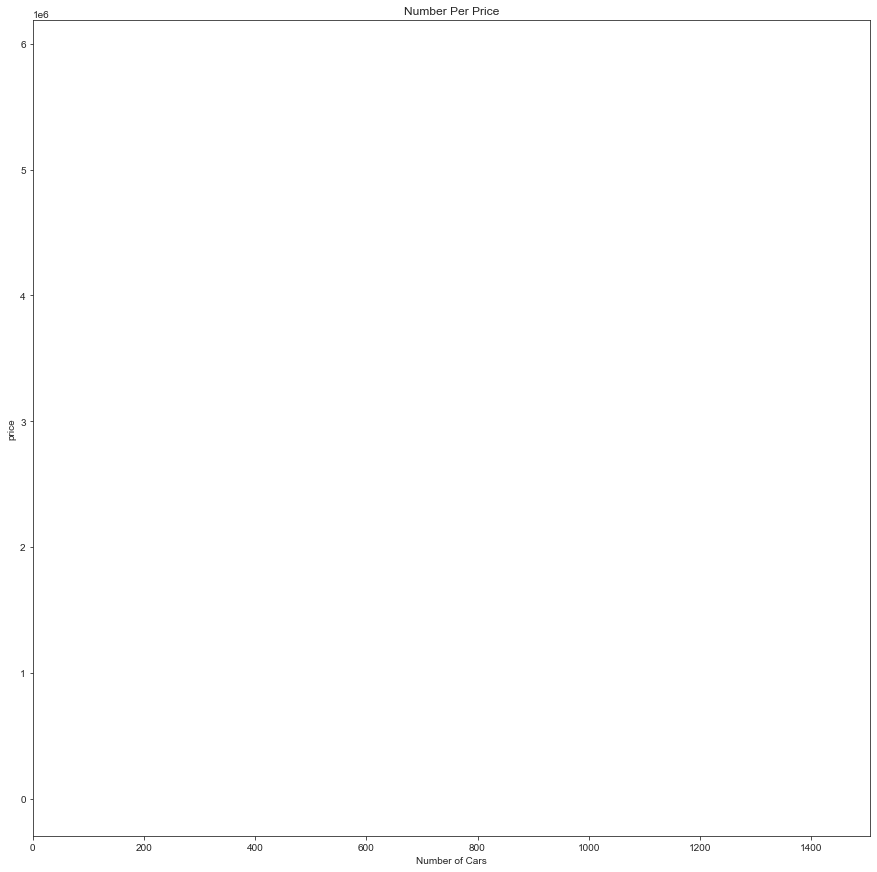

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('ticks')
#colors = sns.color_palette('pastel')
plt.figure(figsize=(15,15))

plt.barh(df['price'].value_counts().index, df['price'].value_counts().values)
plt.xlabel('Number of Cars')
plt.ylabel('price')
plt.title('Number Per Price')

Text(0.5, 1.0, 'Number Per Fuel Comnsumption (g/km)')

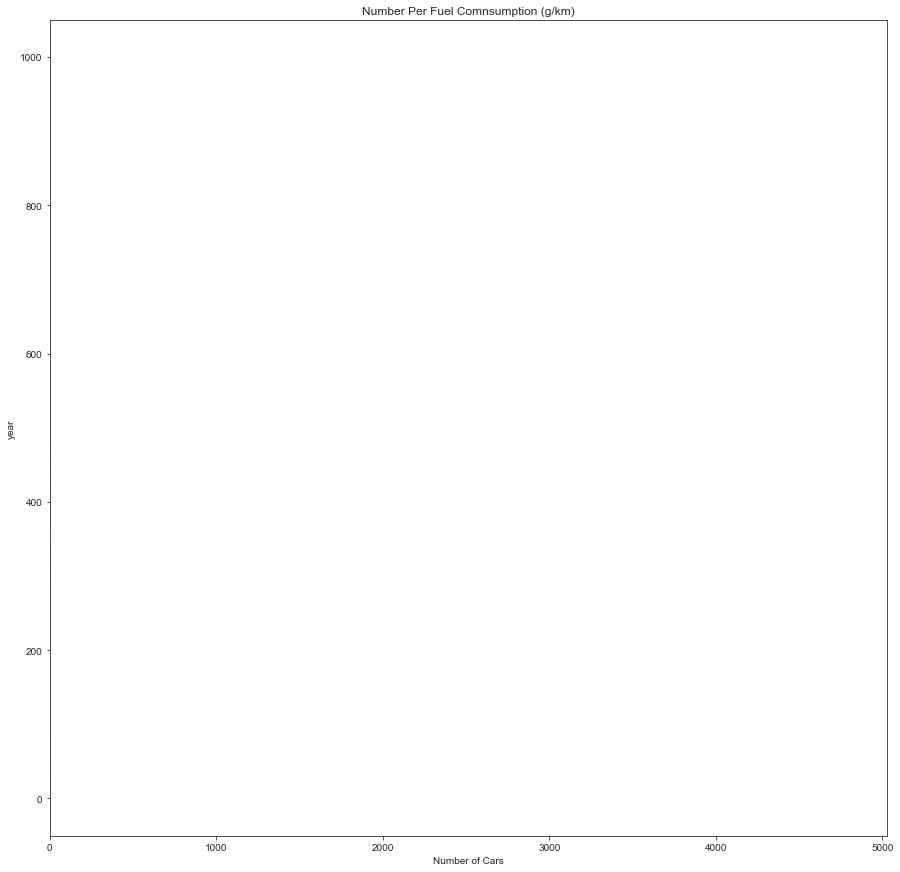

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('ticks')
#colors = sns.color_palette('pastel')
plt.figure(figsize=(15,15))

plt.barh(df['fuel_consumption_g_km'].value_counts().index, df['fuel_consumption_g_km'].value_counts().values)
plt.xlabel('Number of Cars')
plt.ylabel('year')
plt.title('Number Per Fuel Comnsumption (g/km)')

#### TODO: why above did not show anything?

Text(0.5, 1.0, 'Average Price Per Year')

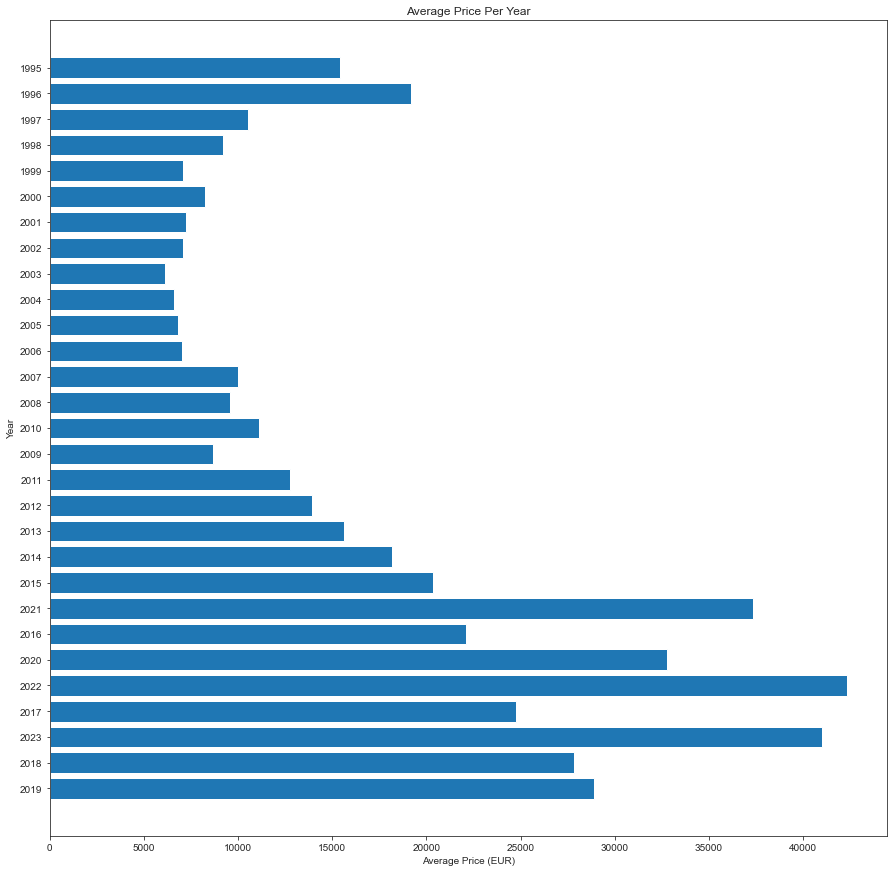

In [138]:
YearPrice = df[['year', 'price']].groupby('year').mean()

plt.figure(figsize=(15,15))
plt.barh(df['year'].value_counts().index, [YearPrice.loc[i][0] for i in df['year'].value_counts().index])
plt.xlabel('Average Price (EUR)')
plt.ylabel('Year')
plt.title('Average Price Per Year')

#### TODO: 
again problem w fuel_consumption_g_km:

Text(0.5, 1.0, 'Average Price Per fuel_consumption_g_km')

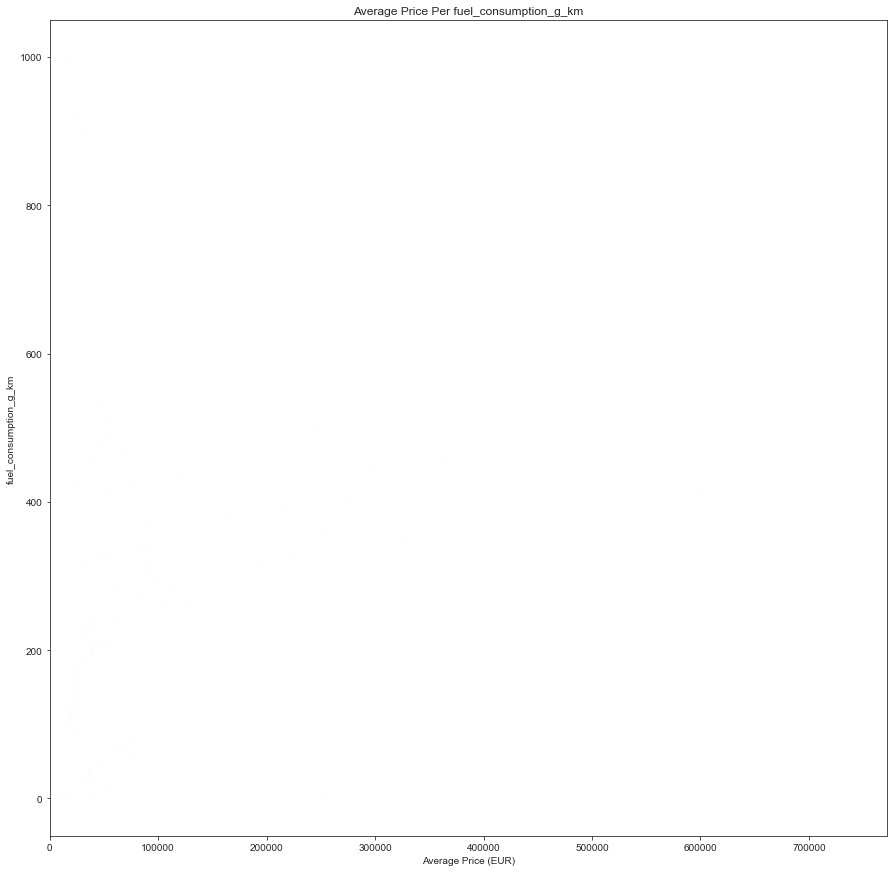

In [139]:
FuelPrice = df[['fuel_consumption_g_km', 'price']].groupby('fuel_consumption_g_km').mean()

plt.figure(figsize=(15,15))
plt.barh(df['fuel_consumption_g_km'].value_counts().index, [FuelPrice.loc[i][0] for i in df['fuel_consumption_g_km'].value_counts().index])
plt.xlabel('Average Price (EUR)')
plt.ylabel('fuel_consumption_g_km')
plt.title('Average Price Per fuel_consumption_g_km')

In [140]:


newCounts = df['brand'].value_counts()
oriCounts = orignal_df['brand'].value_counts()
percents = pd.Series(newCounts)
for brand in df['brand'].value_counts().index:
    percents[brand] = str(round((newCounts[brand]/oriCounts[brand])*100, 2)) + '%'

counts_df = pd.DataFrame(percents)
counts_df.columns = ['Percent Remaining']
counts_df['Original Count'] = oriCounts.values
counts_df['New Count'] = newCounts.values
counts_df = counts_df.sort_values(by = 'Original Count', ascending = False)
counts_df[:10]

,Percent Remaining,Original Count,New Count
volkswagen,99.97%,30268,30258
mercedes-benz,99.97%,24528,24521
audi,99.98%,19479,19475
opel,99.93%,18362,18350
bmw,99.96%,17858,17850
ford,99.96%,16781,16774
skoda,99.95%,12741,12734
seat,99.97%,10989,10986
toyota,99.66%,7430,7405
renault,99.99%,7194,7193


### Featuer Engineering

In [62]:
# since we changed type of some columns, let's reread the dataset
data = pd.read_csv('car_data.csv')

In [63]:
"""we select the following features w numerical calues
to be considered against price"""
numerical_cols = ['model', 'year','price','power_kw', 'fuel_consumption_g_km',
       'mileage_in_km'] 
print(type(numerical_cols),numerical_cols)

<class 'list'> ['model', 'year', 'price_in_euro', 'power_kw', 'fuel_consumption_g_km', 'mileage_in_km']


In [64]:
numerical_cols = numerical_cols.remove('price_in_euro')
print(type(numerical_cols),numerical_cols)

<class 'NoneType'> None


In [58]:
# Convert 'price' column to numeric
data['price_in_euro'] = pd.to_numeric(data['price_in_euro'], errors='coerce')

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
          Unnamed: 0  price_in_euro  mileage_in_km
count  223836.000000   2.237330e+05   2.238360e+05
mean   125630.622130   2.515345e+04   8.749976e+04
std     72797.661024   3.491210e+04   7.913192e+04
min         0.000000   1.200000e+02   0.000000e+00
25%     62734.500000   1.169000e+04   2.668000e+04
50%    125453.500000   1.930000e+04   7.020000e+04
75%    189012.250000   2.899900e+04   1.300000e+05
max    251076.000000   5.890500e+06   3.800000e+06


In [61]:
#print(type(numerical_cols))
# print(numerical_cols)
numerical_cols

## 2-Modeling 

## Splitting the Data Set

In [155]:
# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
#X = df.drop(columns=['price'])  # Assuming 'price' is the target variable
X = df.drop(columns='price')
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(X_train)

## Linear Regression

In [1]:
# This is how to use functions from another jupyter notebook:
%run regression.ipynb
test()

successful ran test function from the regression notebook


## Boosting

## KNN

In [156]:
# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

In [157]:
#Testing the KNN model
# Predictions on the testing set
knn_predictions = knn.predict(X_test)

ValueError: could not convert string to float: 'toyota'

In [ ]:
# Evaluating the KNN model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Accuracy score
knn_accuracy = accuracy_score(y_test)

In [17]:
_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, knn_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, knn_predictions))

NameError: name 'y_train' is not defined

  
  ##  Random Forest
  

In [ ]:
# Training the random forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the model on the training data
rf.fit(X_train, y_train)


# Testing the Random Forest model
# Predictions on the testing set
rf_predictions = rf.predict(X_test)

# Evaluating the Random Forest model
# Accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

 ##    Decision Tree

  ## Train/Test

## Cross-Validation

In [ ]:
# K-Fold cross-validation with KNN modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
knn_cv_scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("KNN Cross-Validation Scores:", knn_cv_scores)

# Calculate and print the mean accuracy score
print("Mean Accuracy:", knn_cv_scores.mean())

# K-Fold Cross-Validation with Random Forest modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold cross-validation
rf_cv_scores = cross_val_score(rf, X, y, cv=kfold)

# Print the cross-validation scores
print("Random Forest Cross-Validation Scores:", rf_cv_scores)

# Calculate and print the mean accuracy score
print("Mean Accuracy:", rf_cv_scores.mean())

## Error Metrics

In [ ]:
# Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# Assuming you have predictions and true labels for regression
# For example, let's say you have predictions from a regression model stored in 'y_pred'
# And the true labels are stored in 'y_true'

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Median Absolute Error (medAE)
medae = median_absolute_error(y_true, y_pred)
print("Median Absolute Error (medAE):", medae)

# Calculate R-squared (R2) score
r2 = r2_score(y_true, y_pred)
print("R-squared (R2) Score:", r2)

## 3-Visualization 
-Matplotlib (i,e), -Seaborn (i,e), -Folium (i,e) 

In [1]:
# Visualization with Folium
import folium

# Create a map centered around a specific location
m = folium.Map(location=[37.7749, -122.4194], zoom_start=12)  # Coordinates for San Francisco

# Add a marker to the map
folium.Marker(location=[37.7749, -122.4194], popup="San Francisco").add_to(m)

# Save the map to an HTML file
m.save("map.html")

ModuleNotFoundError: No module named 'folium'

## 4- Results 
Cross Validation